In [1]:
import scanpy as sc
import graph_tool.all as gt
import schist
import pandas as pd
import seaborn as sns
import anndata
import mygene
import pickle
import scipy.stats
%pylab
%matplotlib inline
#import matplotlib
#matplotlib.use('TkAgg')

/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/SCRNA/lib/python3.8/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [30]:
sc.settings.set_figure_params(dpi=300, facecolor='white')

In [2]:
adata = sc.datasets.paul15()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, copying.


In [3]:
adata.X = adata.X.astype('float64') 

In [4]:
sc.pp.recipe_zheng17(adata)

In [5]:
sc.tl.pca(adata, svd_solver='arpack')

In [6]:
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)
sc.tl.draw_graph(adata)

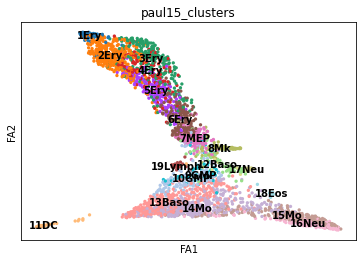

In [7]:
sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')

In [8]:
sc.tl.pca(adata)
sc.tl.umap(adata)

In [9]:
sc.tl.leiden(adata, resolution=3.0)

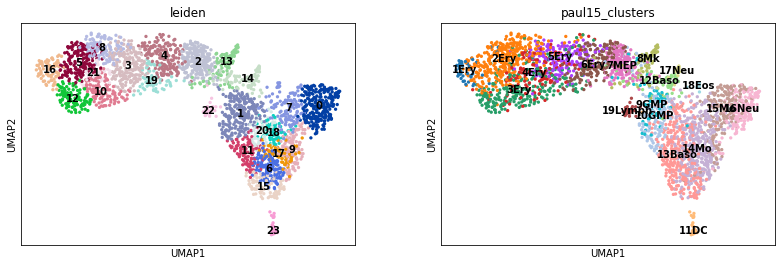

In [10]:
sc.pl.umap(adata, color=['leiden', 'paul15_clusters'], legend_loc='on data')

In [11]:
schist.inference.nested_model(adata, equilibrate=False,deg_corr=True, use_weights=True,steps_anneal=3, n_init=3)

In [12]:
schist.io.write(adata, prefix='state_adata/paul15_minimize_weighted')

In [4]:
adata=schist.io.read('state_adata/paul15_minimize')

In [3]:
sum(adata.uns['nsbm']['stats']['level_entropy'])

183739.72055633174

In [5]:
sum(adata.uns['nsbm']['stats']['level_entropy'])

180282.02582548468

<BarContainer object of 10 artists>

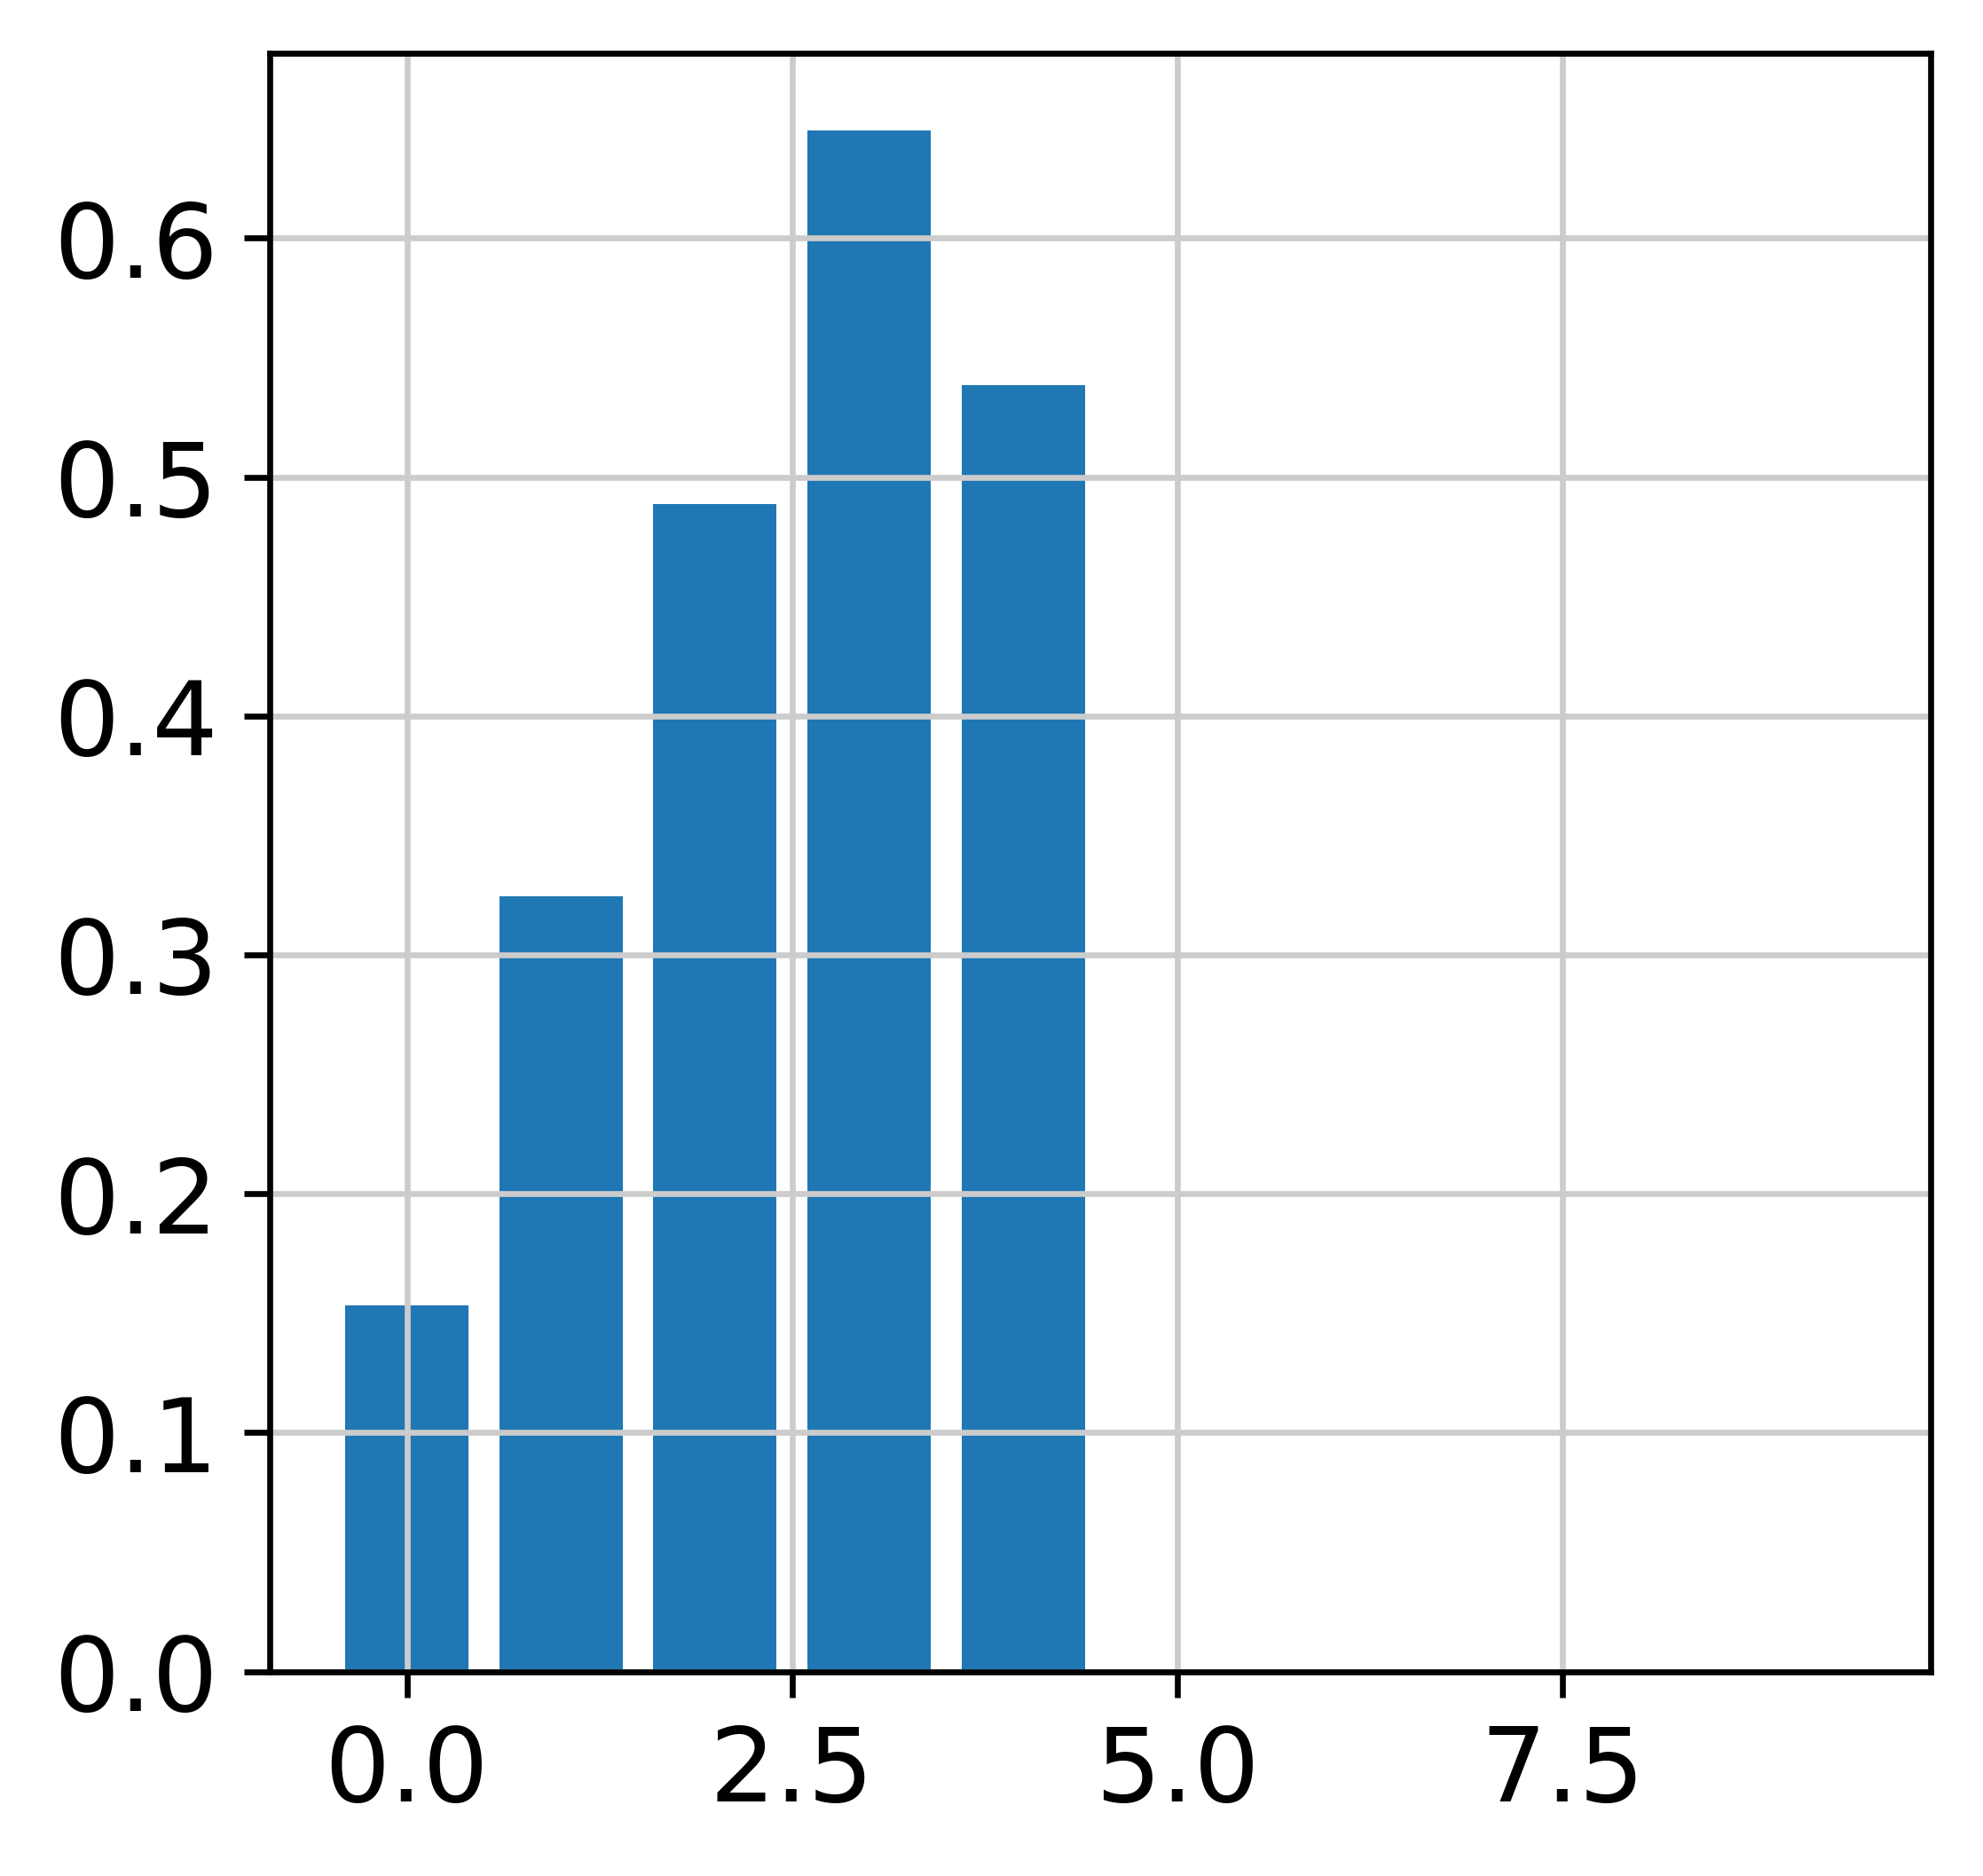

In [40]:
modularity=[x for x in adata.uns['nsbm']['stats']['modularity']]
levels=[x for x in range(len(modularity))]
bar(levels,modularity)

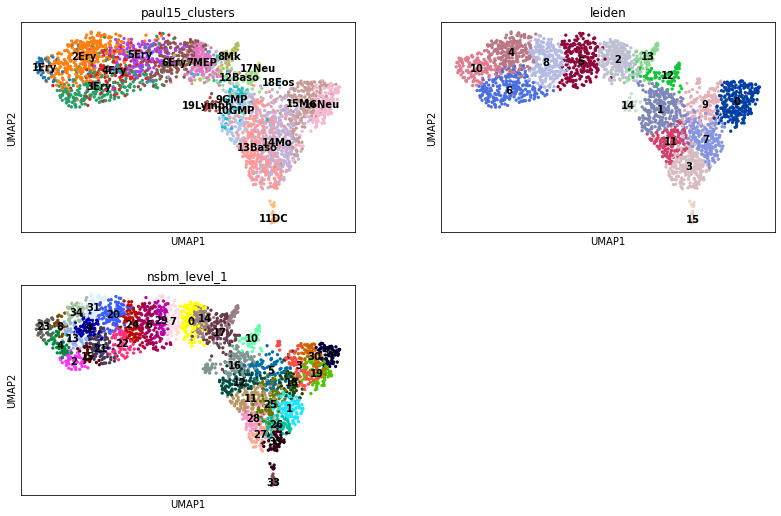

In [20]:
sc.tl.leiden(adata, resolution=2.280)
sc.pl.umap(adata, color=['paul15_clusters', 'leiden','nsbm_level_1'], ncols=2, legend_loc='on data')

<ipython-input-27-bea26495dd5f>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  flat=pd.Series()
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy shoul

2
10
21
23
31
32
33


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

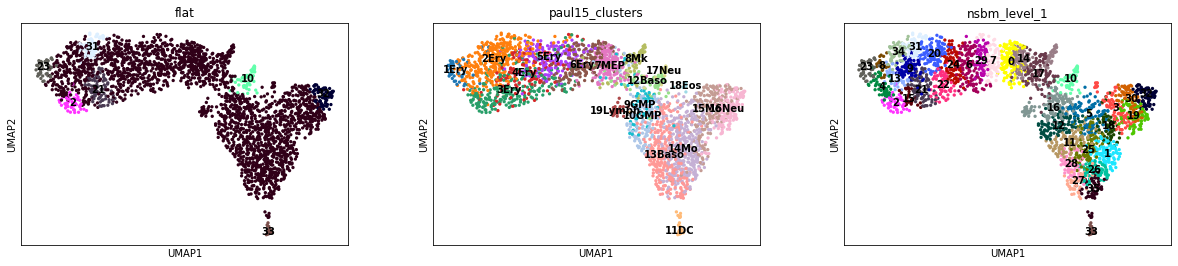

[0.1885245901639344, 0.07547169811320754, 0.022222222222222223, 0.12643678160919541, 0.14, 0.07291666666666667, 0.06481481481481481, 0.14285714285714285, 0.13636363636363635, 0.08974358974358974, 0.01818181818181818, 0.125, 0.08247422680412371, 0.15384615384615385, 0.24242424242424243, 0.14285714285714285, 0.06802721088435375, 0.1111111111111111, 0.08771929824561403, 0.06578947368421052, 0.05405405405405406, 0.046511627906976744, 0.109375, 0.023255813953488372, 0.08791208791208792, 0.11650485436893204, 0.09333333333333334, 0.07547169811320754, 0.14516129032258066, 0.14285714285714285, 0.06944444444444445, 0.030303030303030304, 0.027777777777777776, 0.0, 0.06557377049180328, 0.06779661016949153]


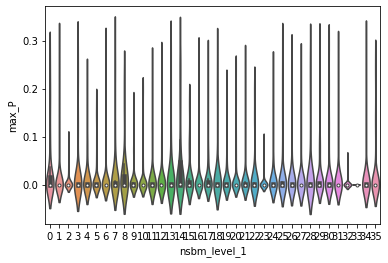

In [27]:
level=str(1)
marginals = adata.uns['nsbm']['cell_affinity'][level] 
adata.obs['max_P'] = -np.log10(np.max(marginals, axis=1))
#adata.obs['max_P'] = np.max(marginals,axis=1)
group_sig=[]
group_names = adata.obs[f'nsbm_level_{level}'].cat.categories
for group in group_names:
    adata0=adata[adata.obs[f'nsbm_level_{level}']==group]
    c=0
    for i in adata0.obs['max_P']:
        if i>0.05:
#        if i>0.95:
            c=c+1
    c=c/(len(adata0.obs['max_P']))
    group_sig.append(c)
cdata=adata
flat=pd.Series()
for i in range(len(group_sig)):
    if group_sig[i]<0.05:
#    if group_sig[i]>0.95:
        a=pd.Series(cdata.obs[f'nsbm_level_{level}'][cdata.obs[f'nsbm_level_{level}']==str(i)], index=cdata.obs[f'nsbm_level_{level}'].index[cdata.obs[f'nsbm_level_{level}']==str(i)])
        flat=pd.Series.append(flat,a, ignore_index=False, verify_integrity=True)
        print(i)
cdata.obs['flat']=flat
sc.pl.umap(cdata, color=['flat','paul15_clusters',f'nsbm_level_{level}'],legend_loc='on data')
print(group_sig)

sns.violinplot(x=f'nsbm_level_{level}', y='max_P', data = adata.obs, scale='width')

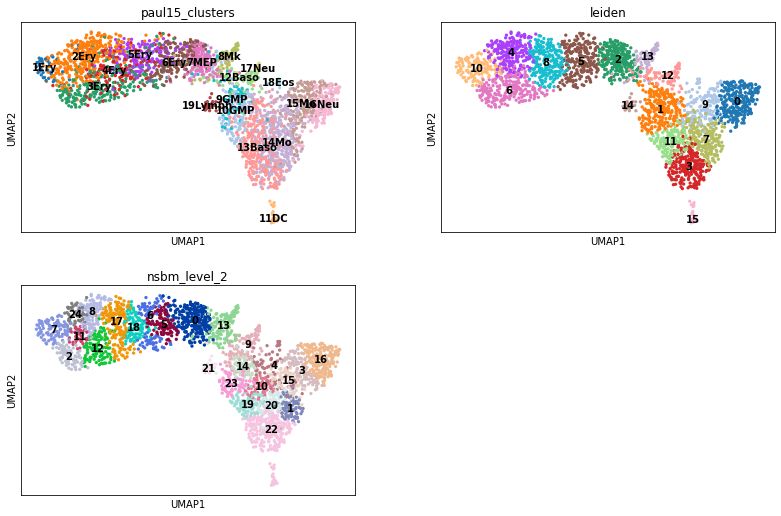

In [12]:
sc.tl.leiden(adata, resolution=2.280)
sc.pl.umap(adata, color=['paul15_clusters', 'leiden','nsbm_level_2'], ncols=2, legend_loc='on data')

### gerarchia paga leiden vs gerarchia nsbm minimize

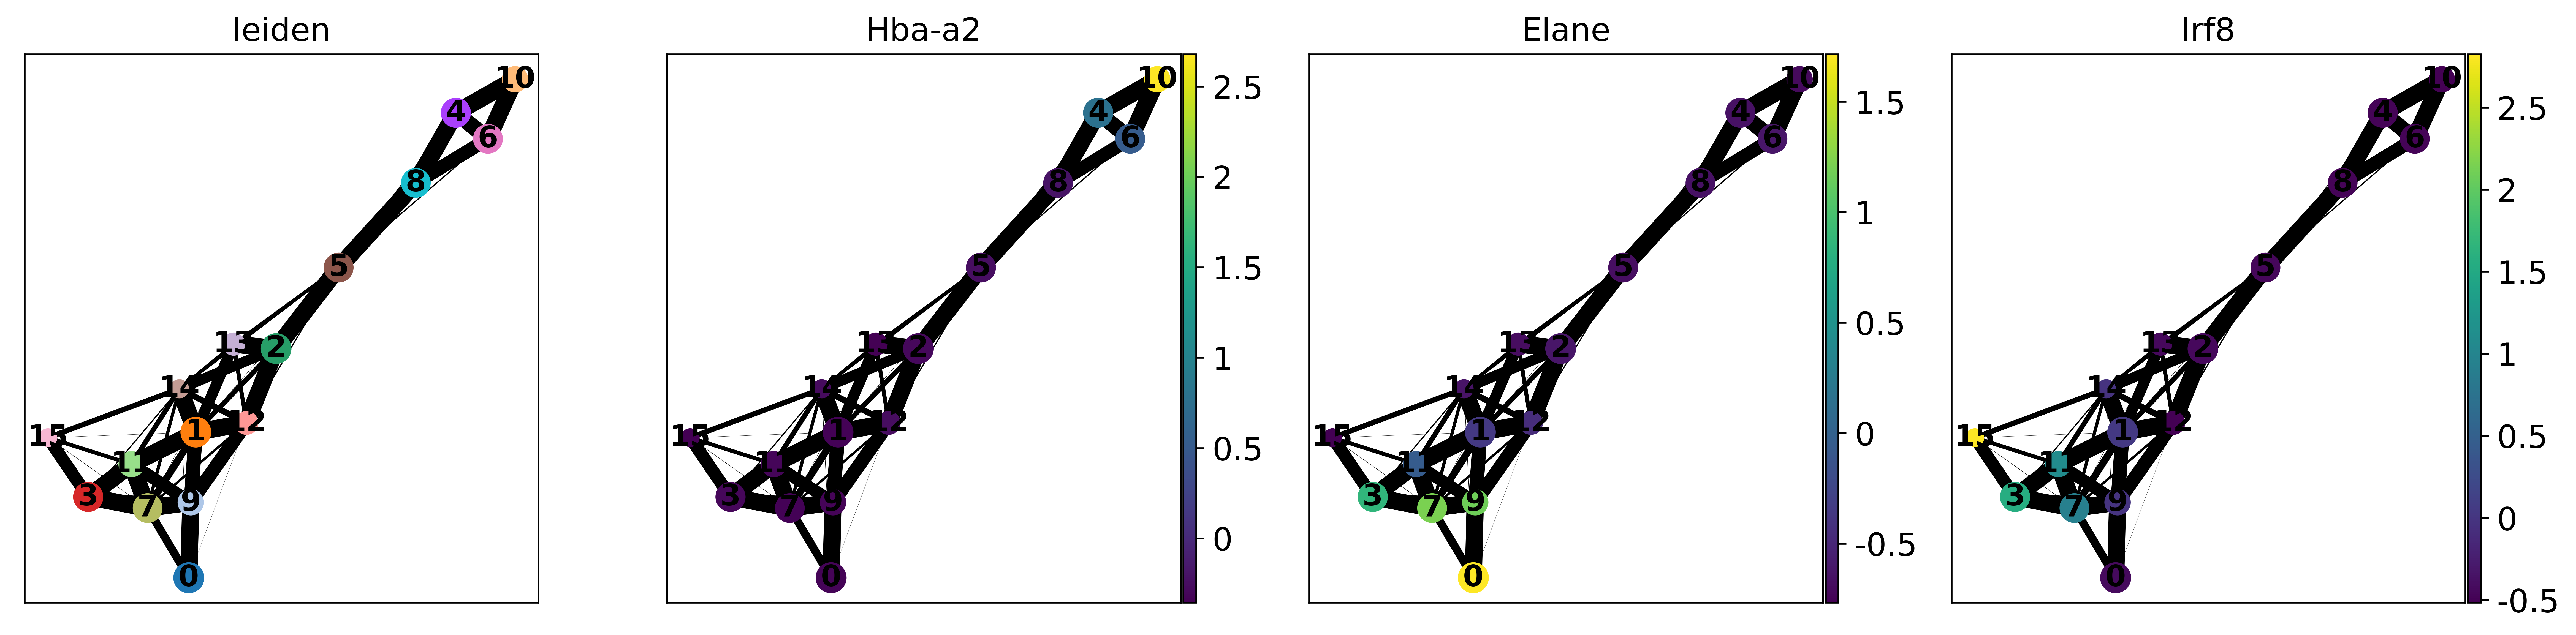

In [46]:
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden', 'Hba-a2', 'Elane', 'Irf8'])

In [50]:
import networkx as nx
G=nx.from_numpy_matrix(adata.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adata.uns['paga']['connectivities'].todense().A1.reshape((16,16))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

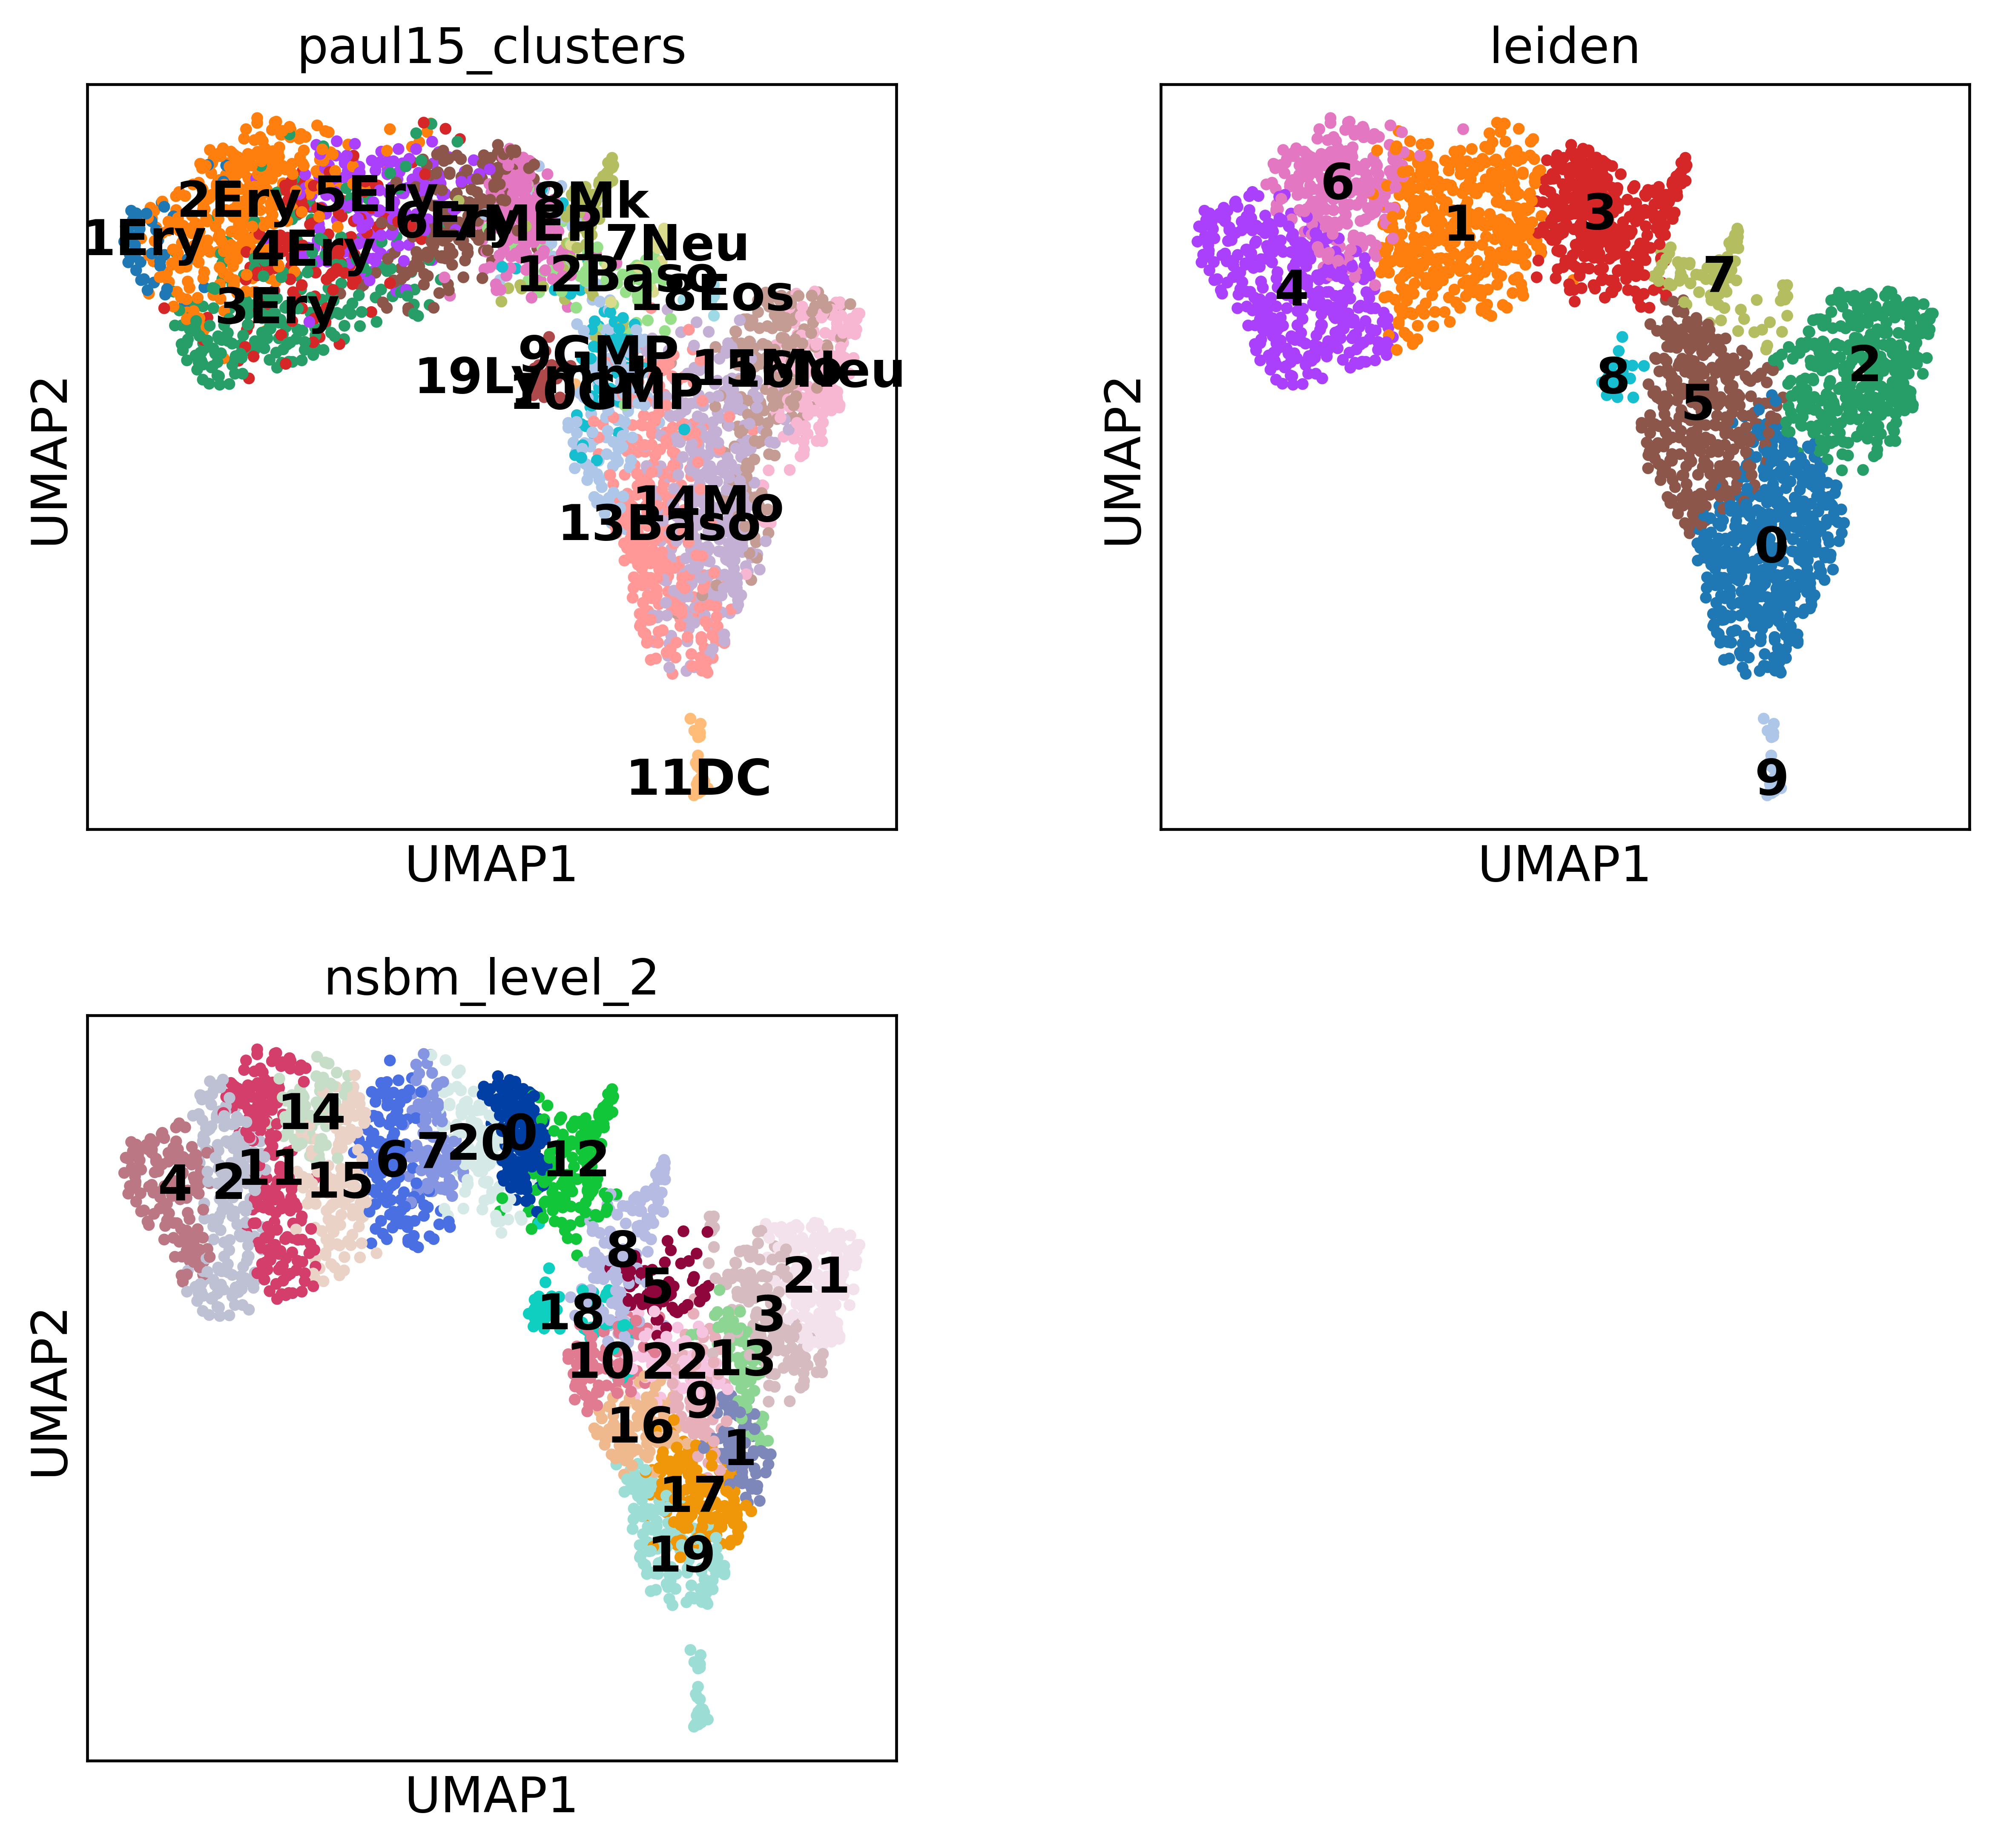

NonGuiException: 

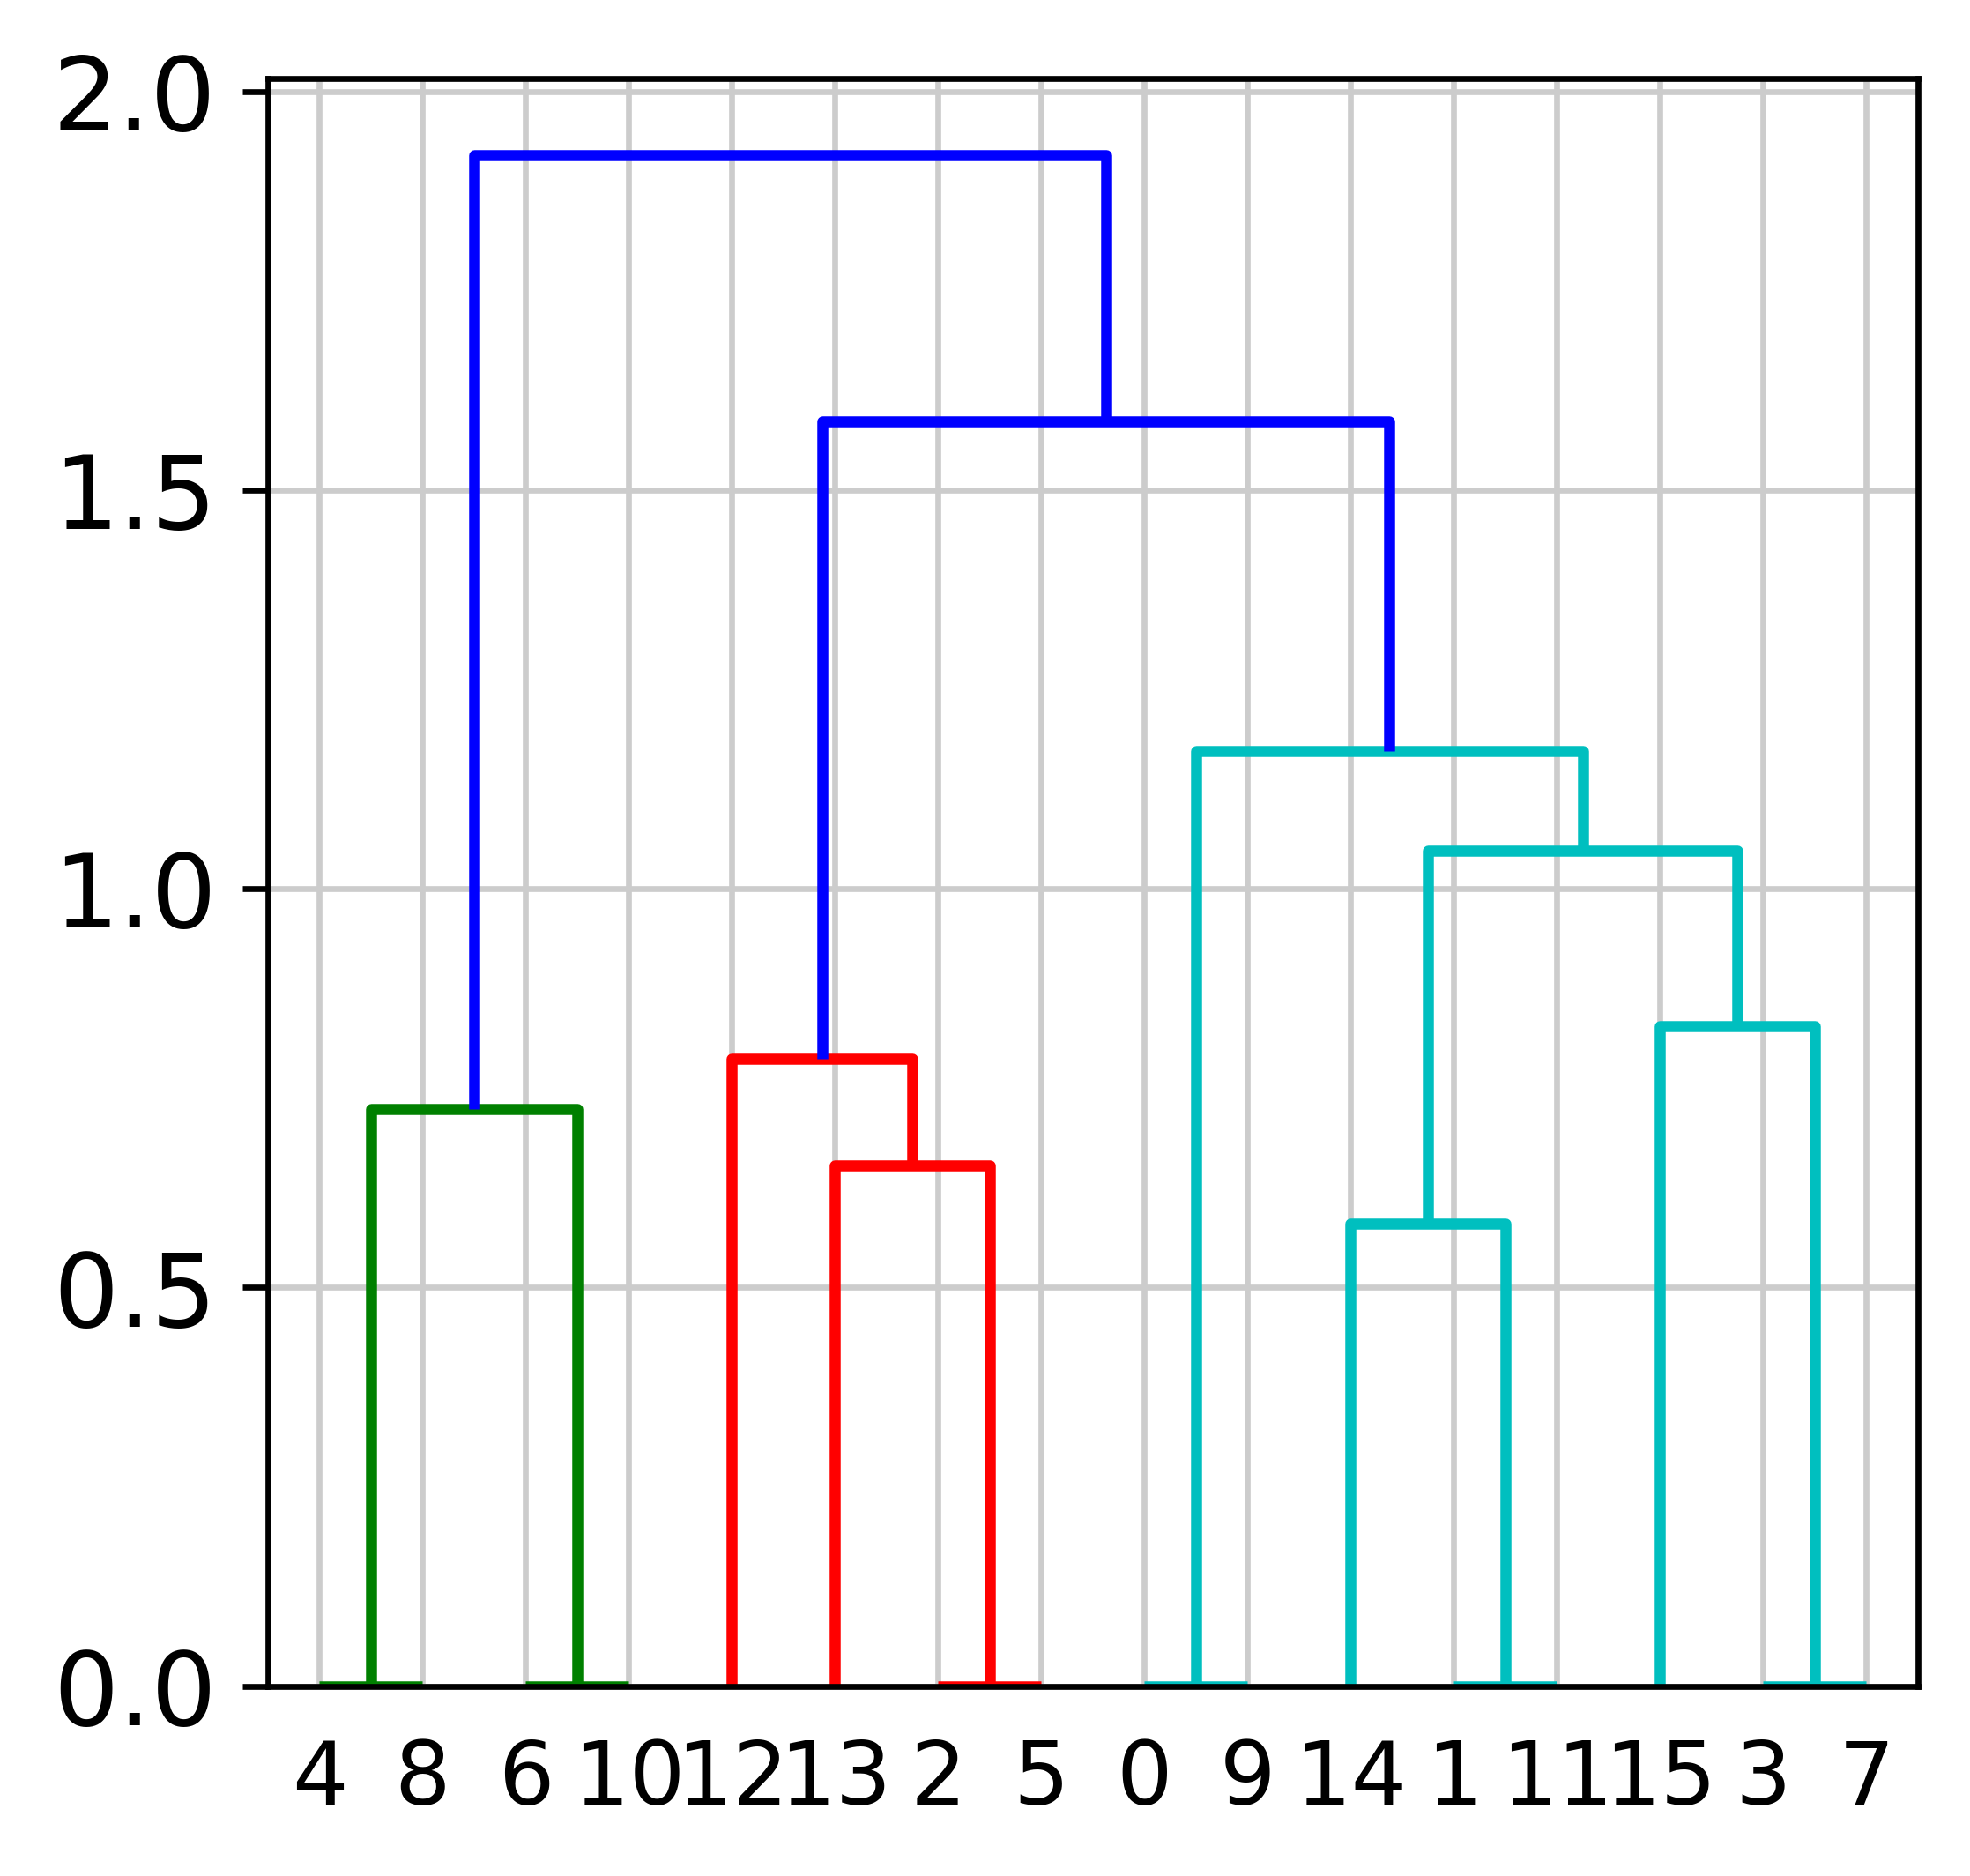

In [51]:
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color=['paul15_clusters', 'leiden', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adata,level_end=6, level_start=3)

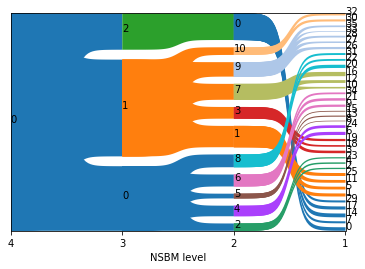

In [17]:
schist.pl.alluvial(adata,level_end=4, level_start=1)

In [61]:
display_level=3
thr = np.unique([x[3] for x in dendrogram['dcoord']])



cdata = adata.copy()
levels = [np.array(dendrogram['leaves'])]
for l in [scipy.cluster.hierarchy.fcluster(cluster, criterion='distance', t=x) for x in thr]:
    levels.append(np.array(l) - 1)

labels = np.array(adata.obs['leiden'].astype(int))
new_labels = np.zeros_like(labels)
    
for lx in range(1, len(levels)):
    tl = levels[lx - 1]
    nl = levels[lx]
    for l in np.unique(nl):
        for lb in np.where(nl == l)[0]:
            new_labels[labels == lb] = l
    cdata.obs[f'nsbm_level_{lx+display_level}'] = pd.Categorical(new_labels).astype(str)
    labels = new_labels
    new_labels = np.zeros_like(labels)



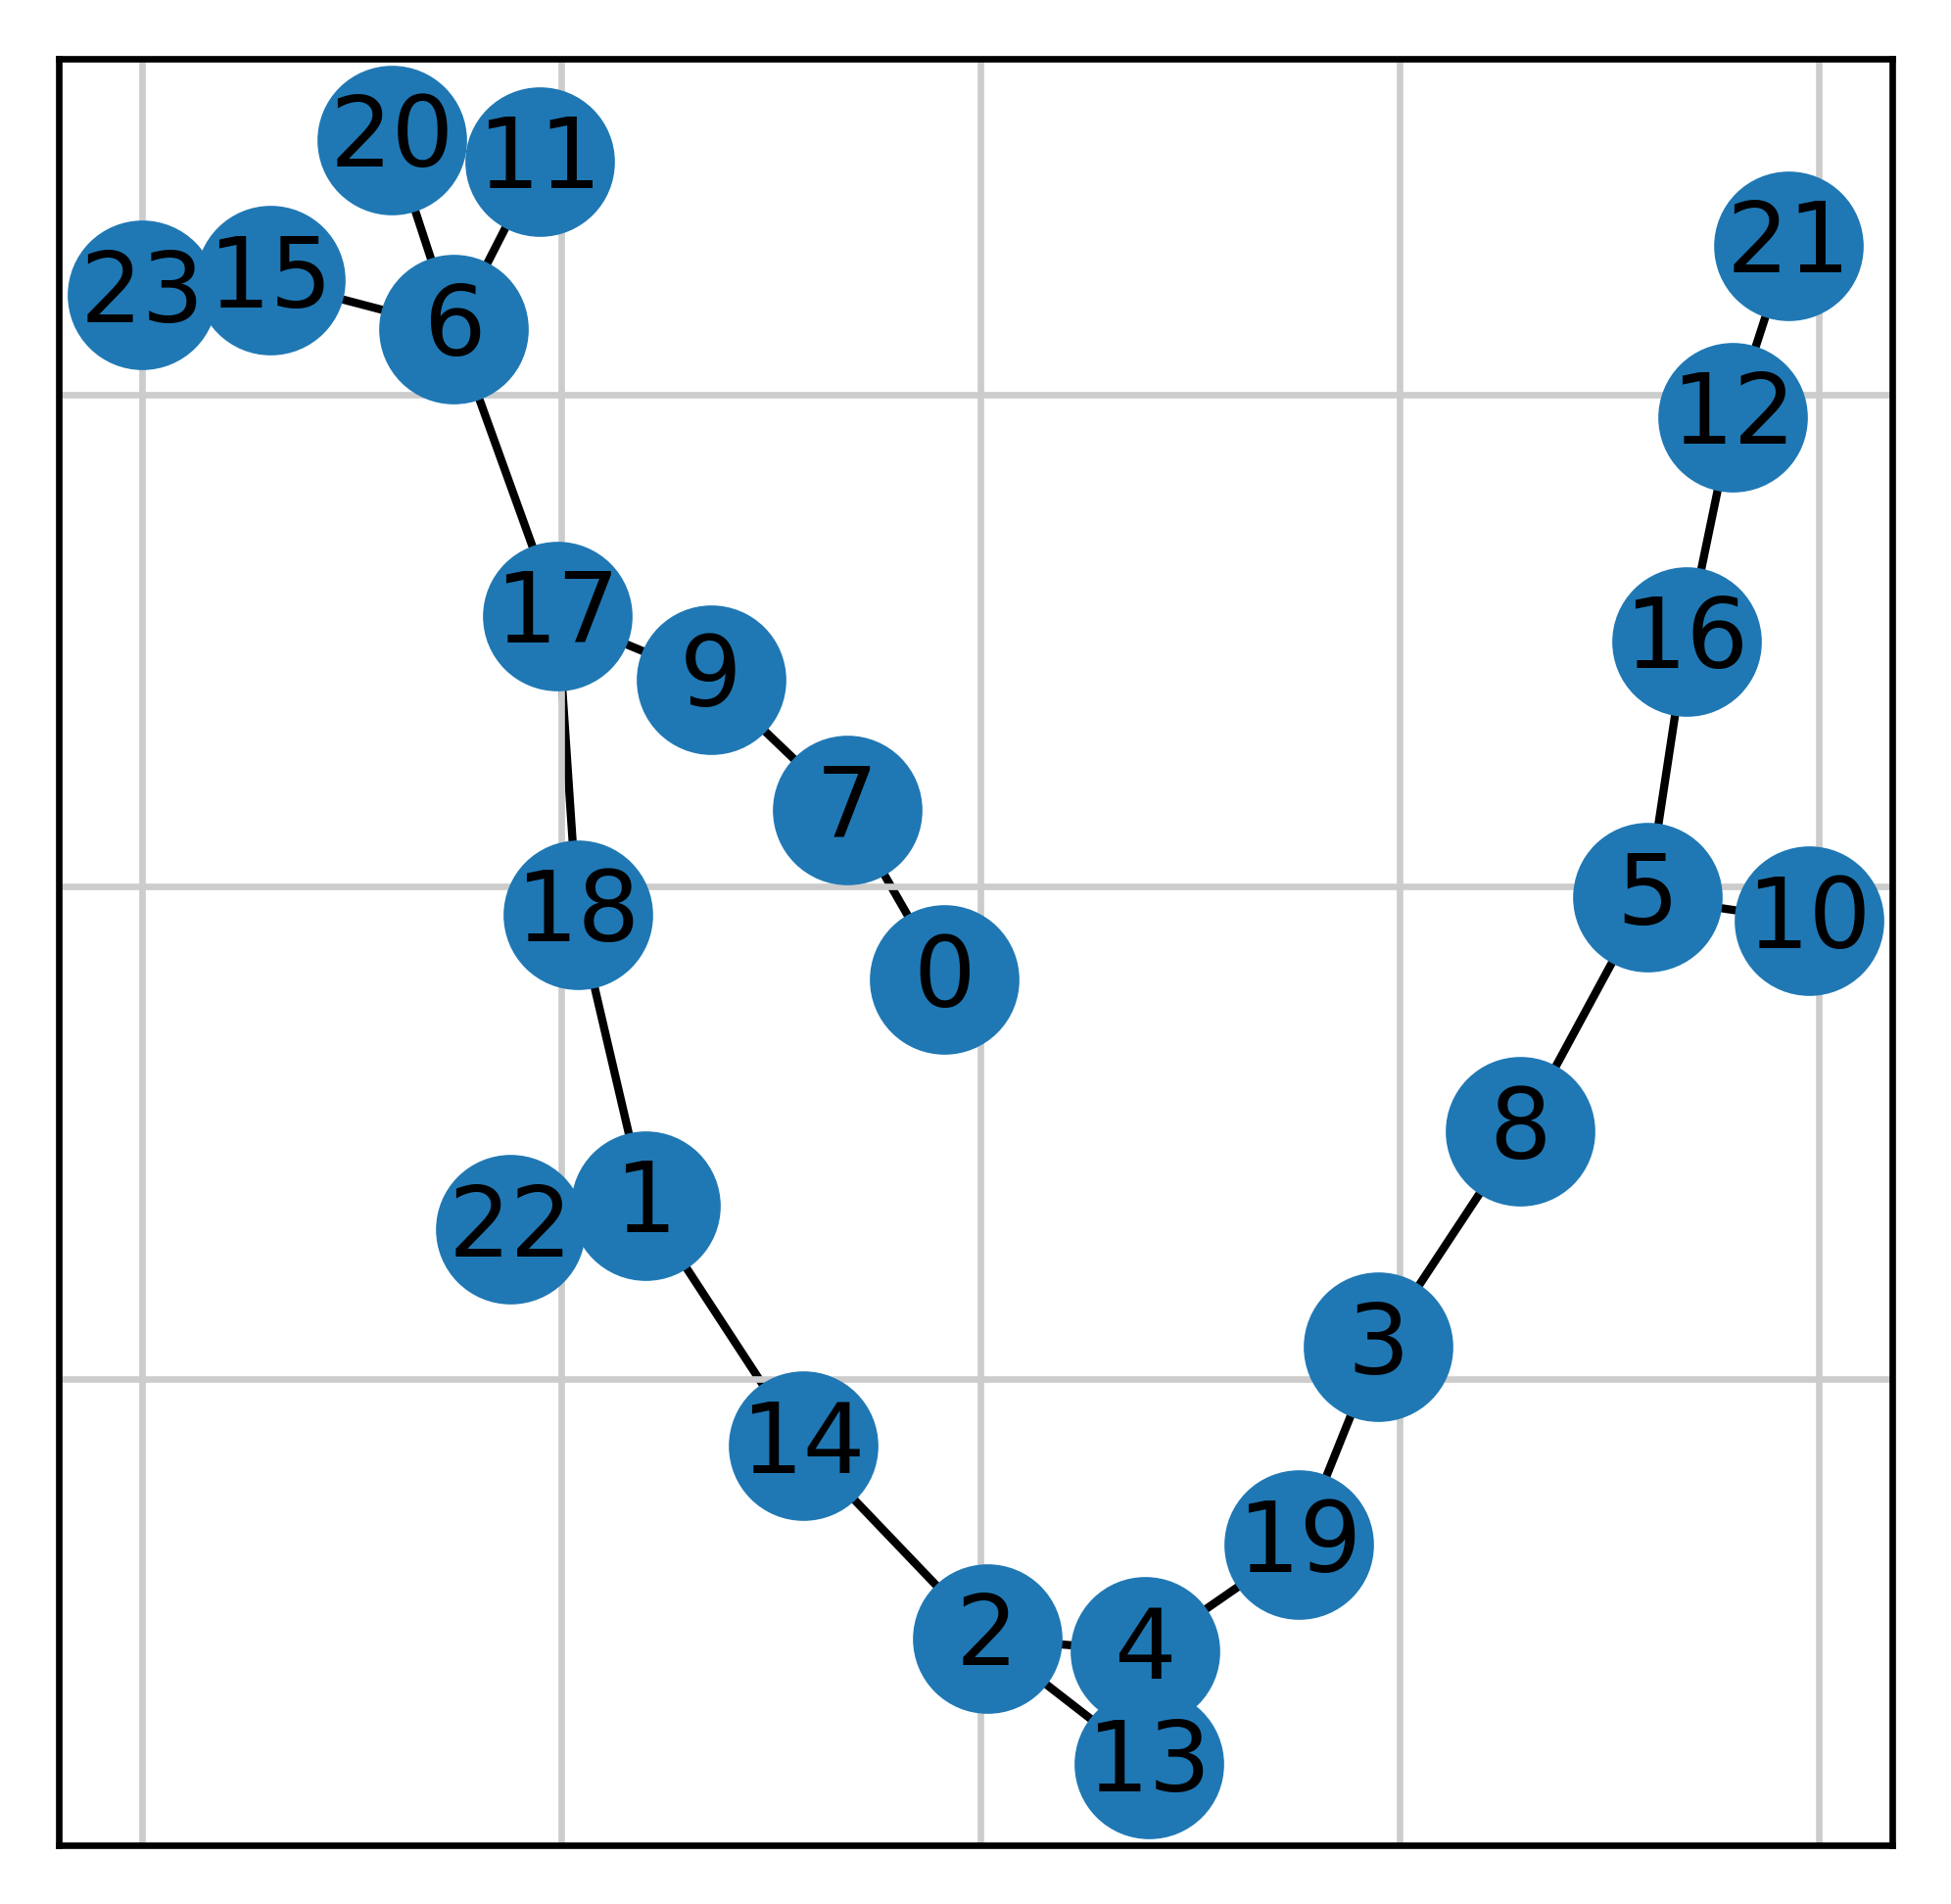

In [24]:
nx.draw_networkx(G)

Il modello NSBM Divide perfettamente il ramo eritroide da quello mieloide, inoltre isola le MEP dal resto della gerarchia e unisce ramo eritroide, mieloide e MEP alla fine.
Anche leiden divide bene i due rami (eritroide e mieloide), ma unisce precocemente MEP a basofili e neutrofili.
### gerarchia paga NSBM vs gerarchia NSBM minimize

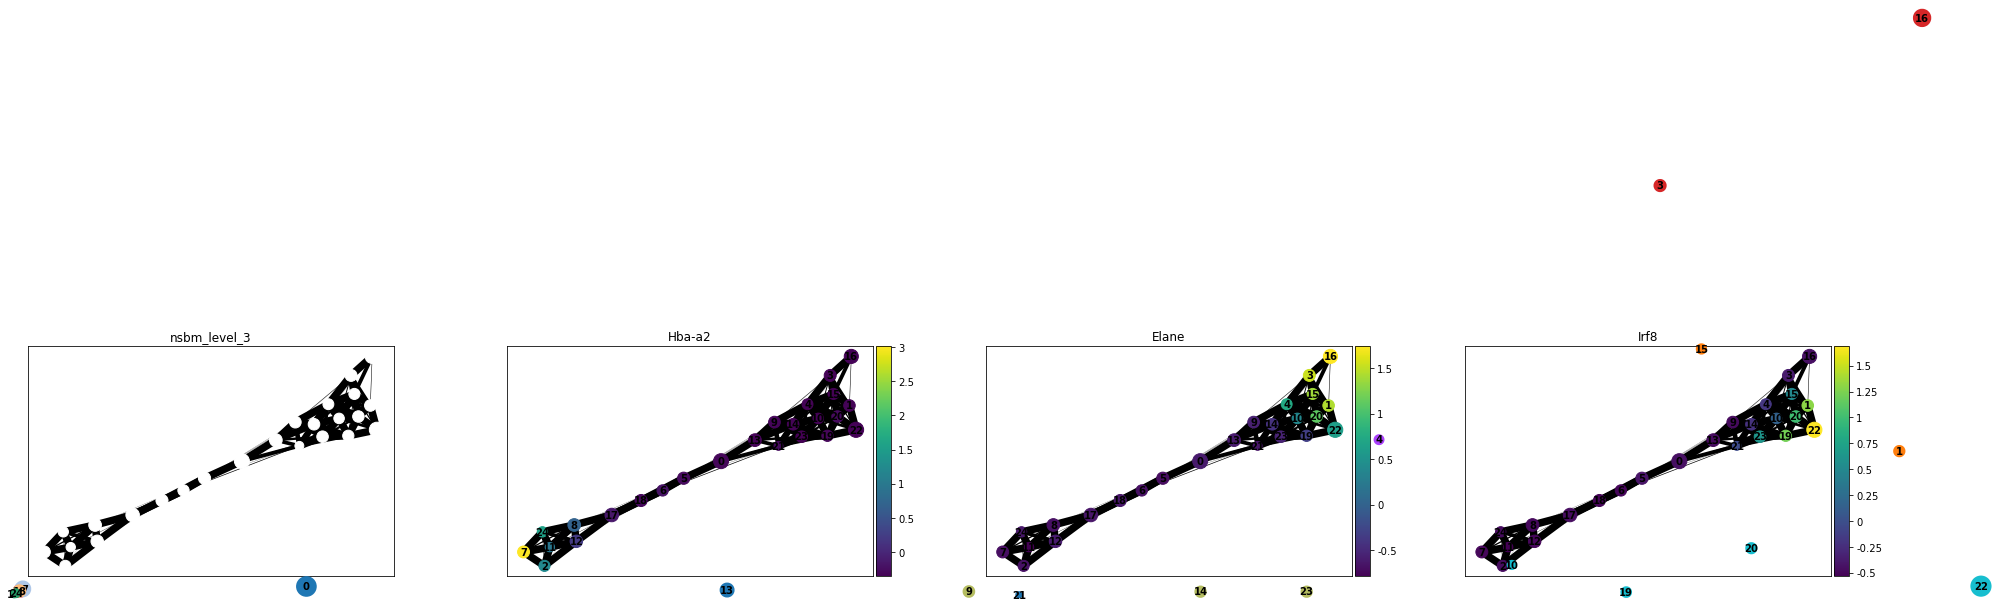

In [15]:
sc.tl.paga(adata, groups='nsbm_level_2')
sc.pl.paga(adata, color=['nsbm_level_3', 'Hba-a2', 'Elane', 'Irf8'])

In [18]:
import networkx as nx
G=nx.from_numpy_matrix(adata.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adata.uns['paga']['connectivities'].todense().A1.reshape((25,25))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.average(1-Mc)

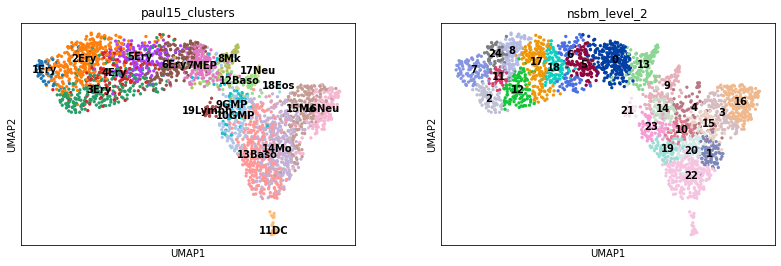

NonGuiException: 

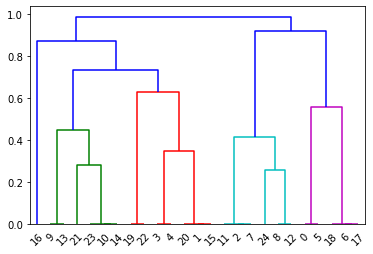

In [20]:
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color=['paul15_clusters', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adata,level_end=6, level_start=3)

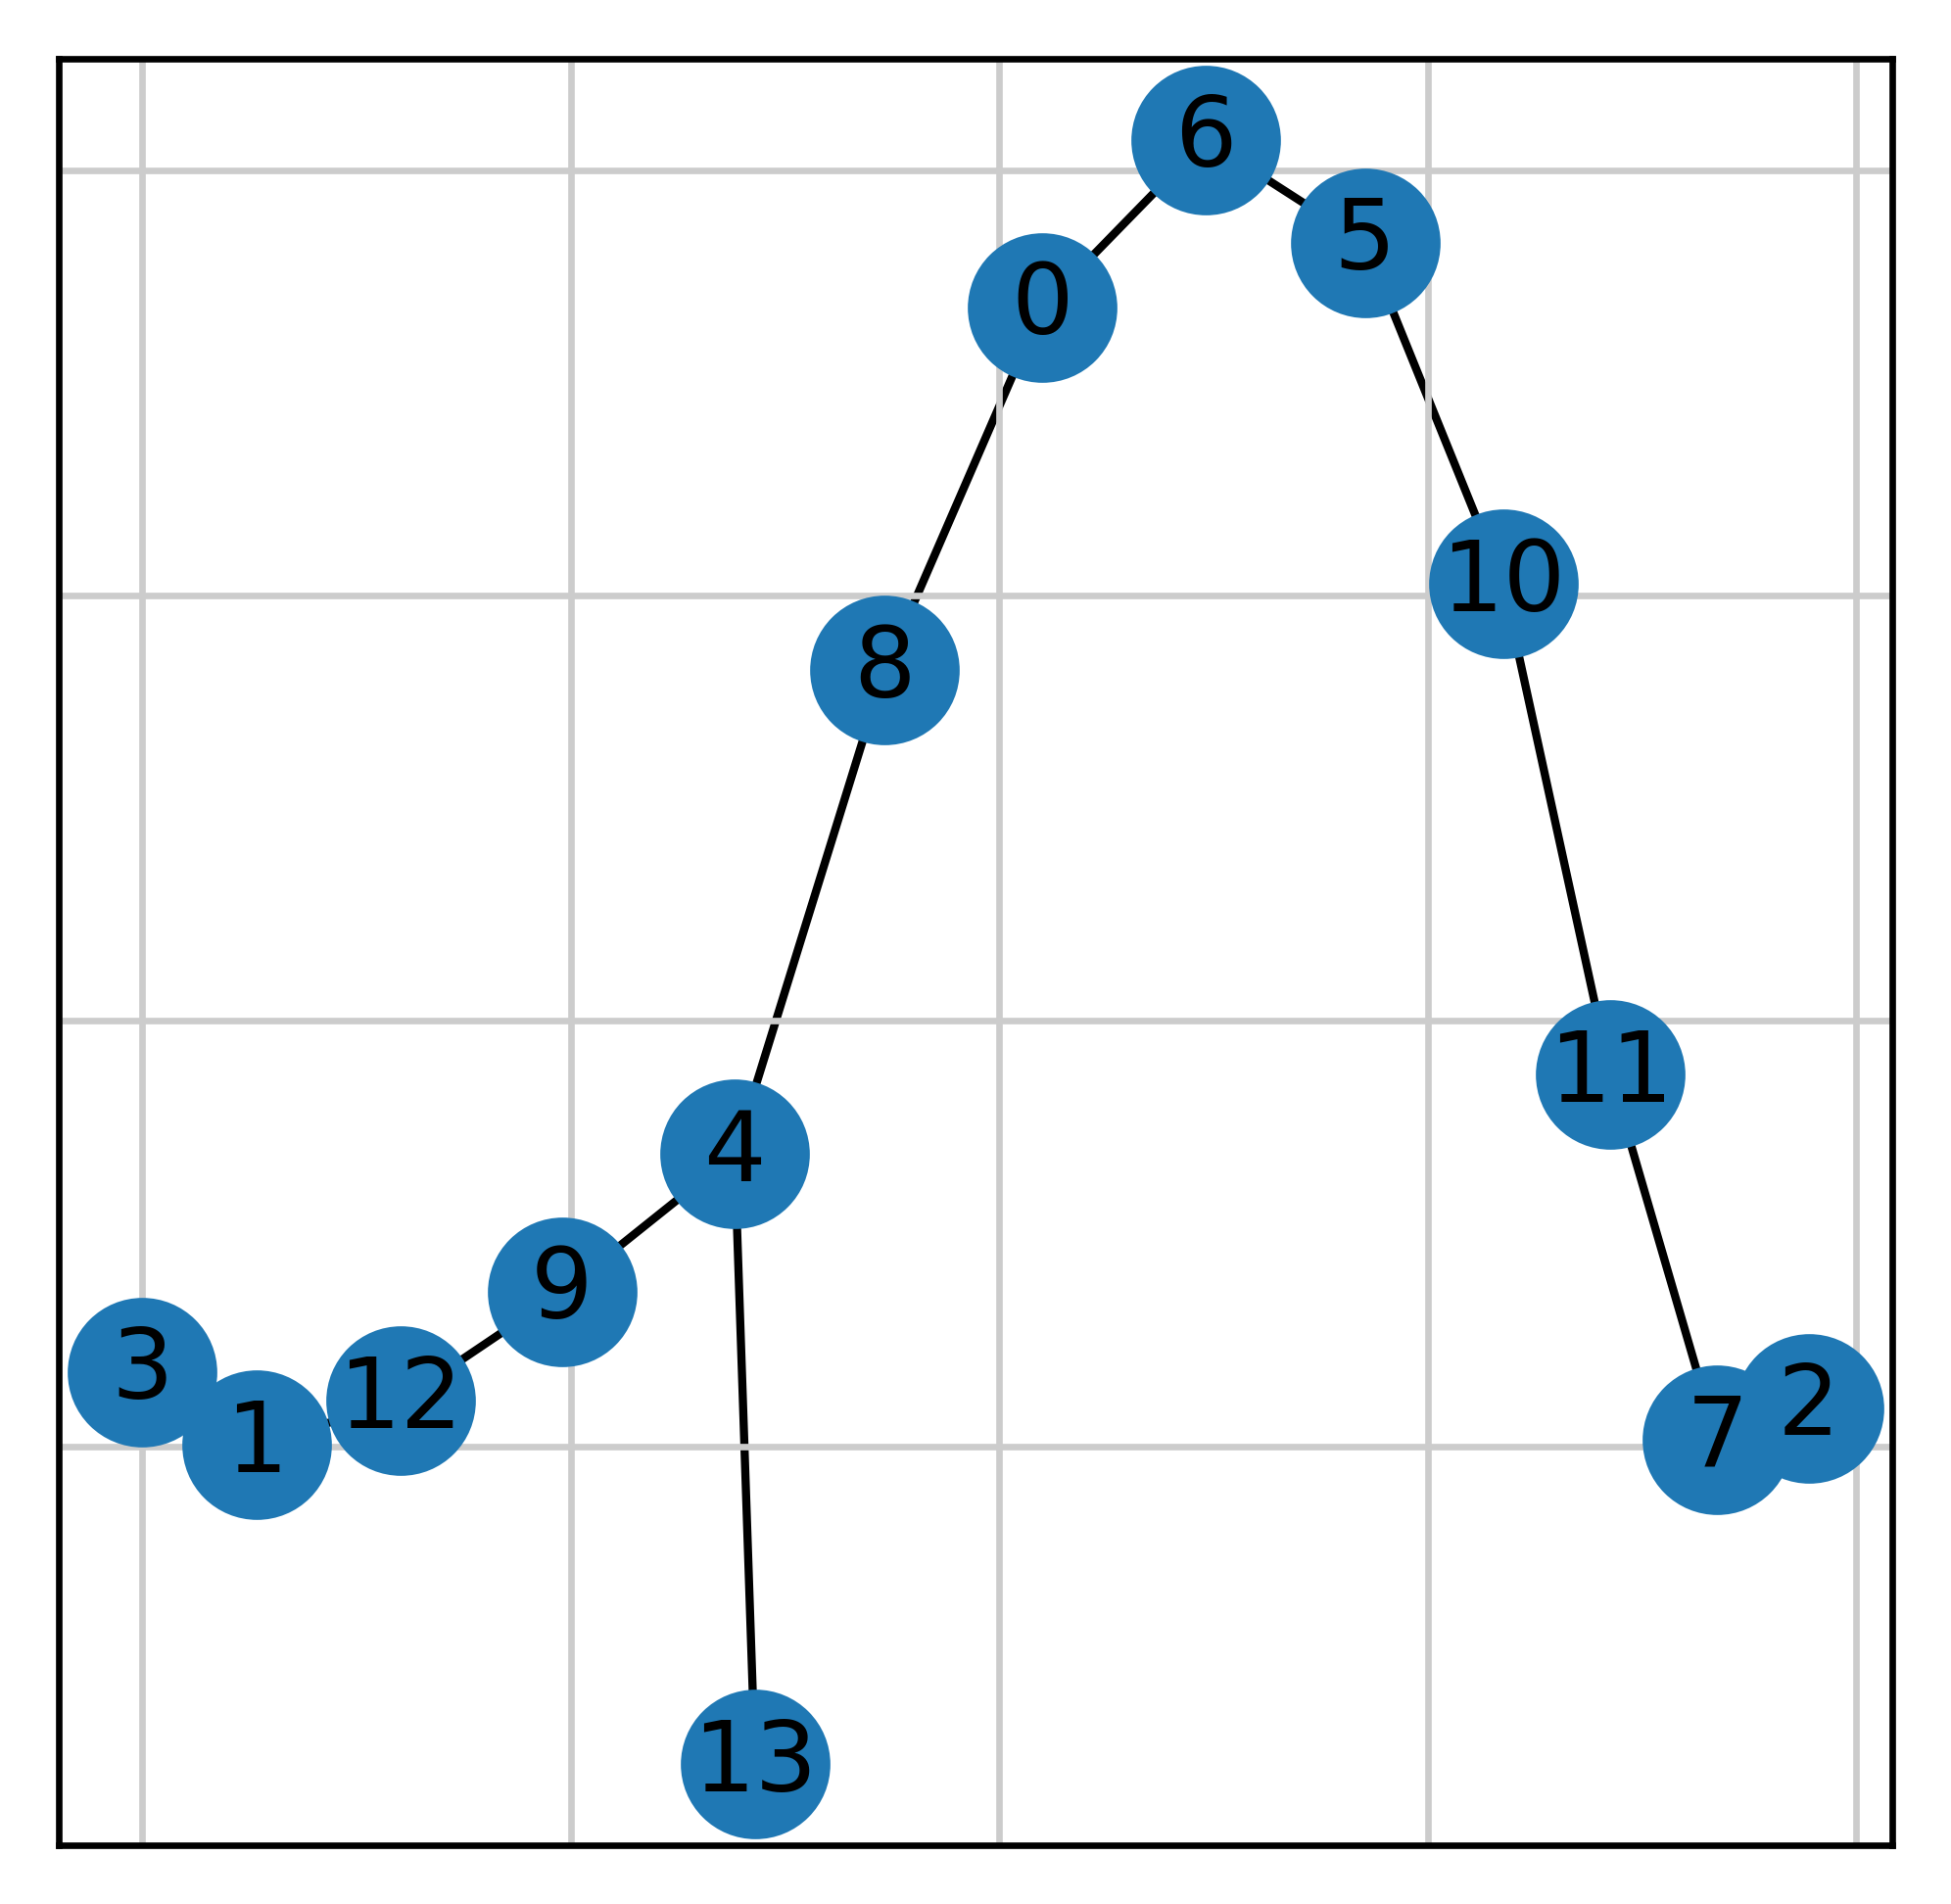

In [28]:
nx.draw_networkx(G)

anche qui si osservano le stesse problematiche relative a paga
# Equilibrate

In [9]:
scnsbm.inference.nested_model(adata, random_seed=42, equilibrate=True, deg_corr=True,steps_anneal=3, n_init=3)

In [10]:
scnsbm.io.write(adata, prefix='state_adata/paul15_equilibrate')

In [2]:
adata=scnsbm.io.read('state_adata/paul15_equilibrate')

In [12]:
sum(adata.uns['nsbm']['stats']['level_entropy'])

178249.77487106278

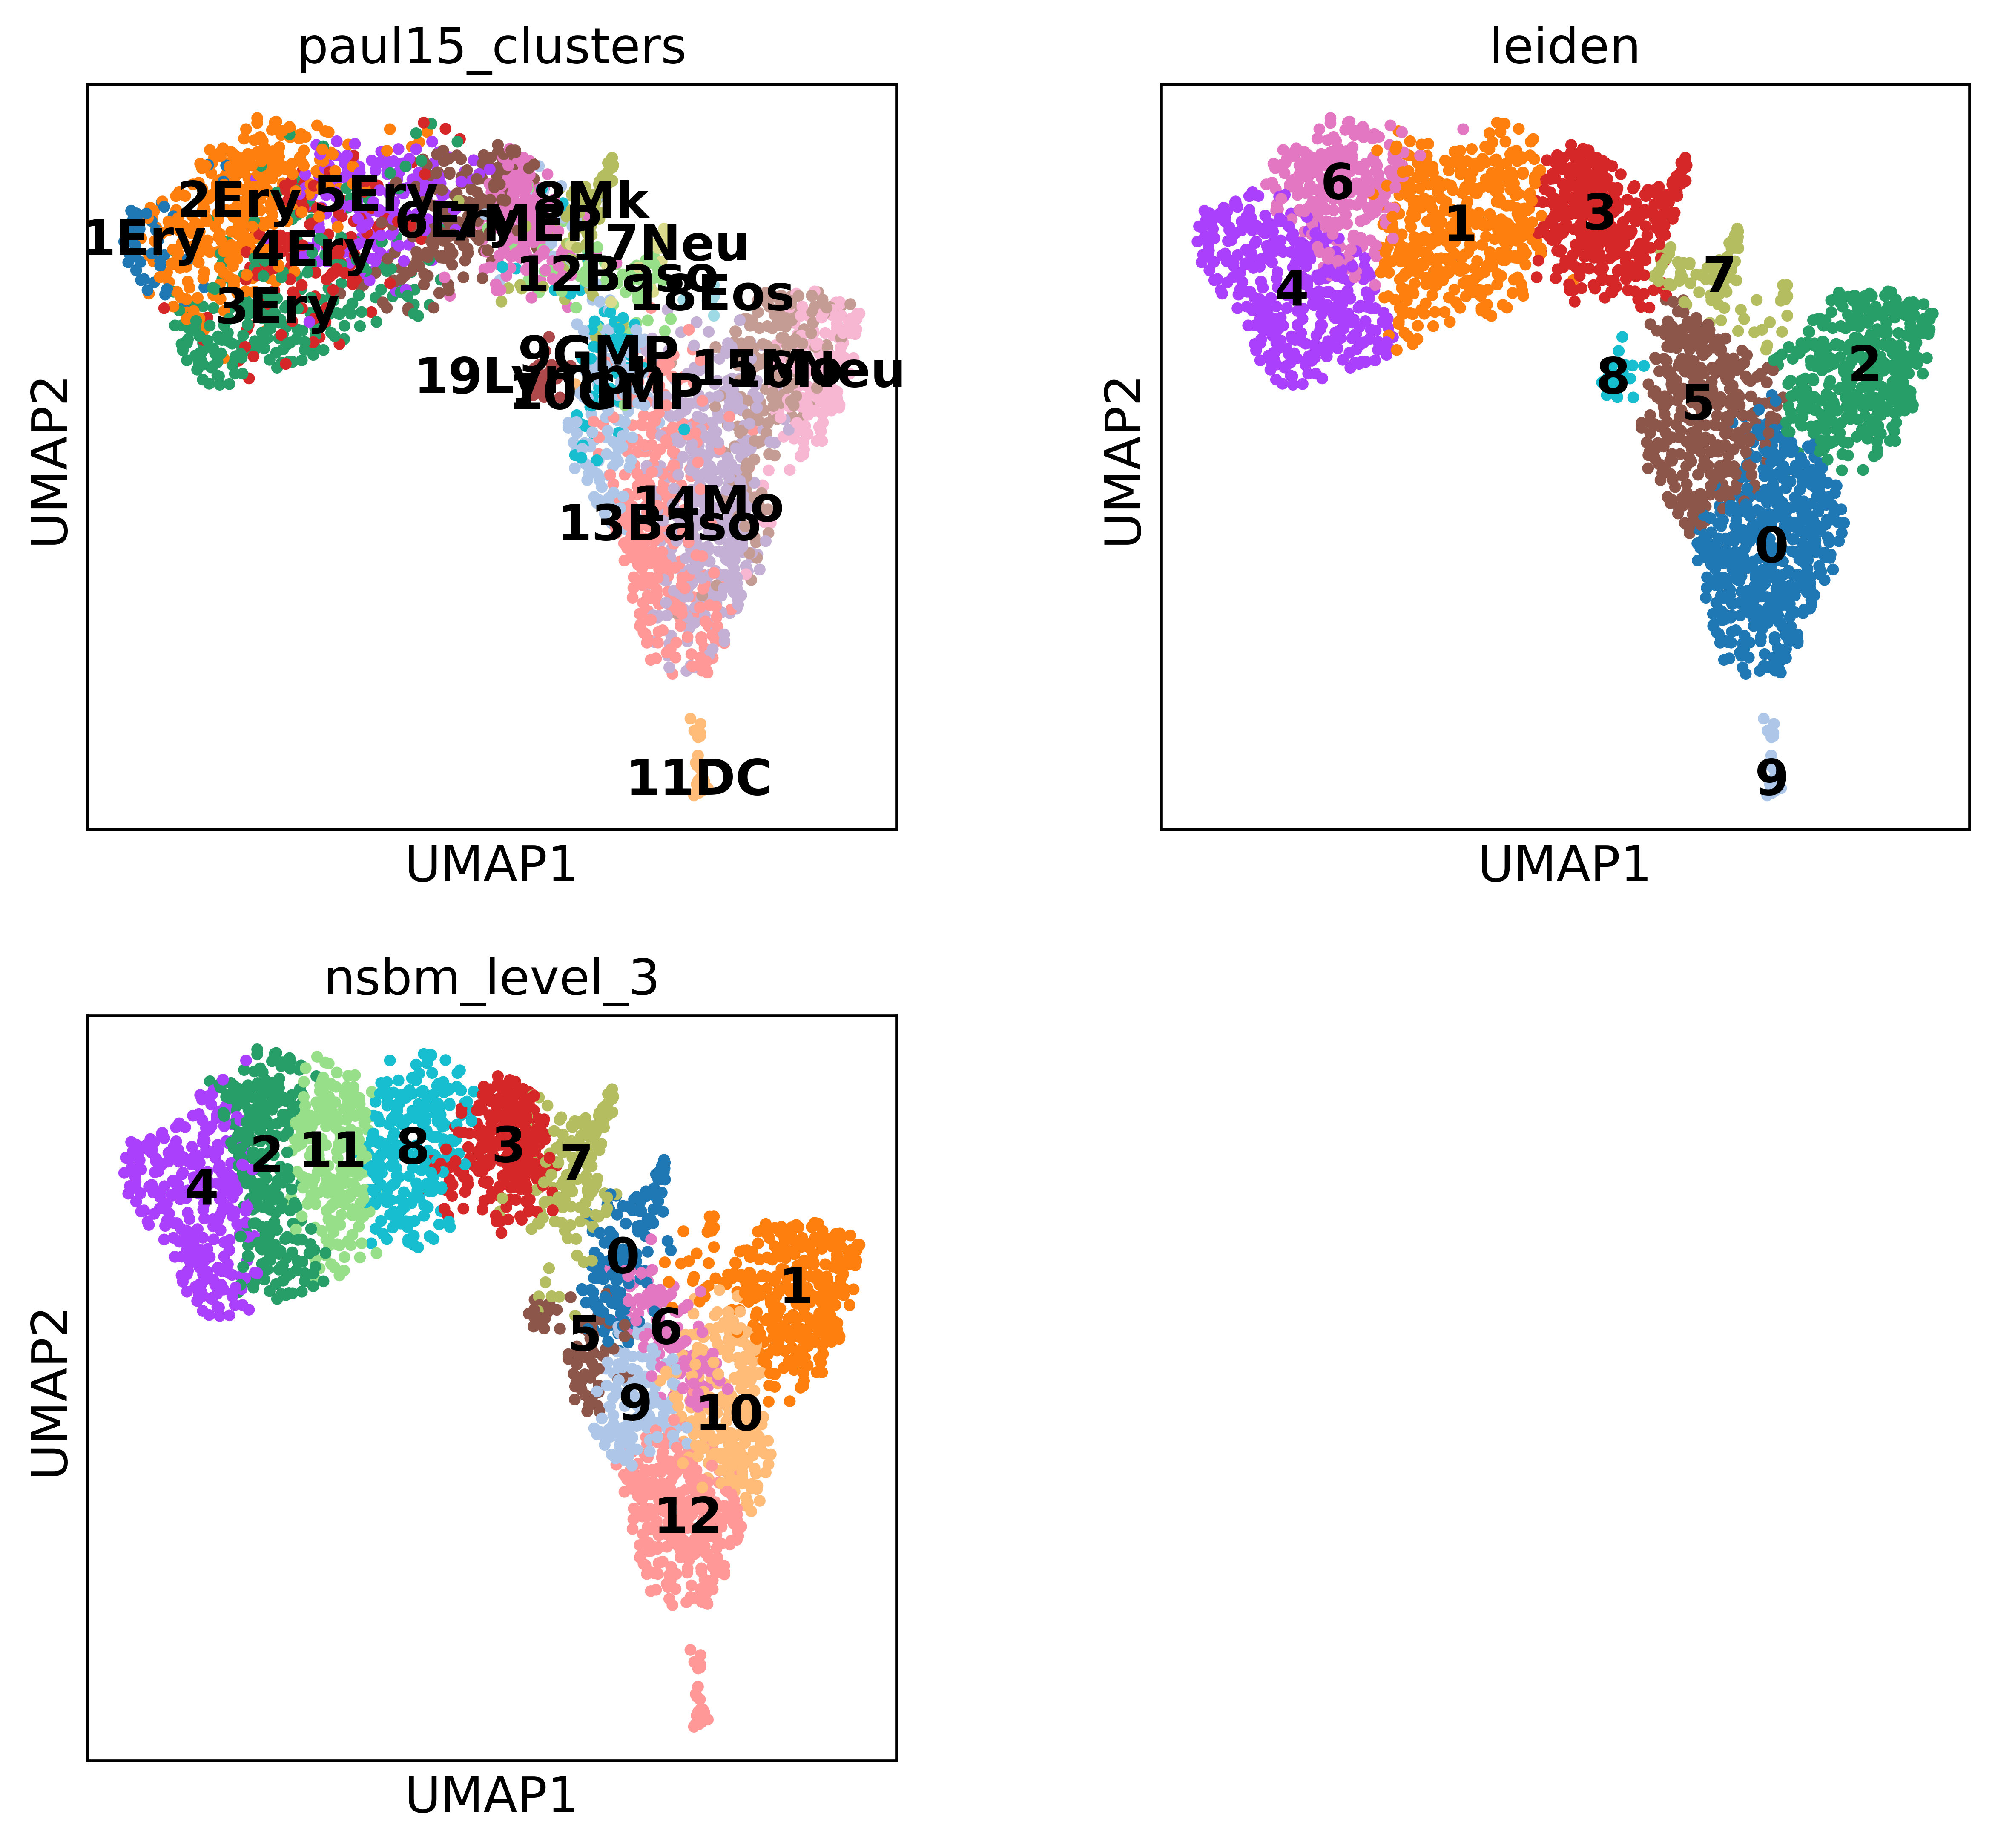

In [13]:
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color=['paul15_clusters', 'leiden', 'nsbm_level_3'], ncols=2, legend_loc='on data')

Trying to set attribute `.uns` of view, copying.


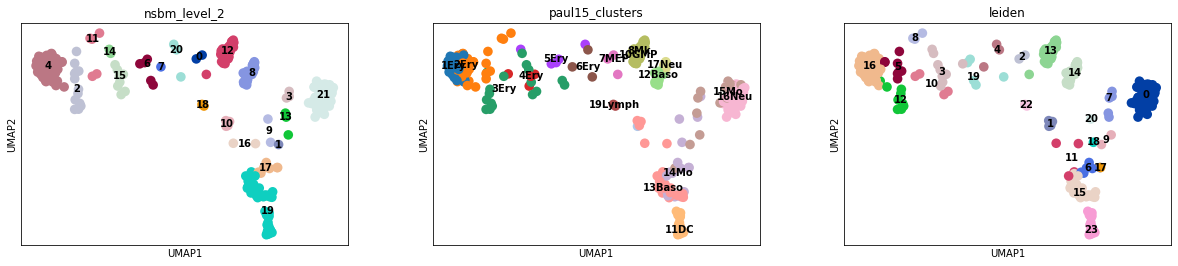

In [5]:
M=adata.uns['nsbm']['cell_affinity']['2']
adata.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adata[adata.obs.max_u < 1e-100], color=['nsbm_level_2','paul15_clusters','leiden'], legend_loc='on data')

### gerarchia paga leiden vs gerarchia nsbm equilibrate

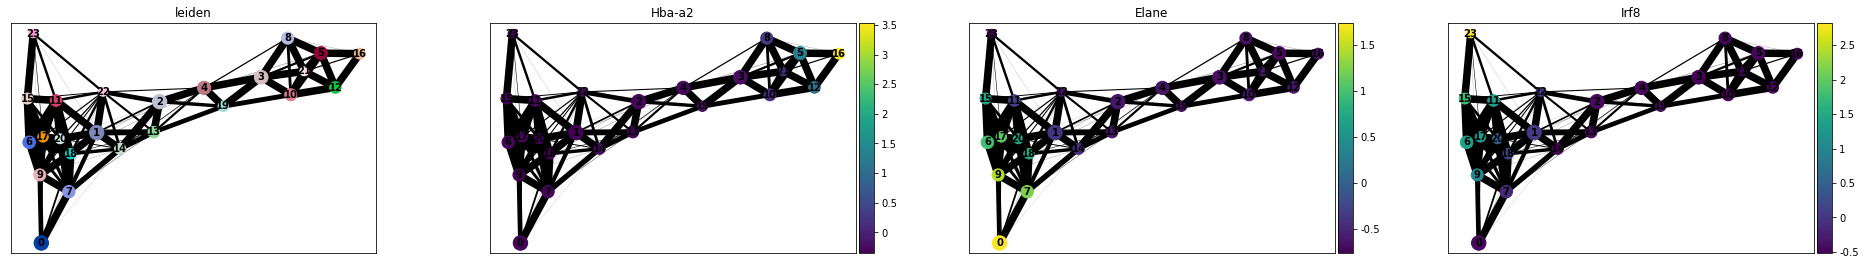

In [3]:
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, color=['leiden', 'Hba-a2', 'Elane', 'Irf8'])

In [11]:
import networkx as nx
G=nx.from_numpy_matrix(adata.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adata.uns['paga']['connectivities'].todense().A1.reshape((24,24))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.average(1-Mc)

In [14]:
sc.tl.leiden(adata, resolution=1.0)
sc.pl.umap(adata, color=['paul15_clusters', 'leiden', 'nsbm_level_3'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adata,level_end=6, level_start=3)

In [16]:
scnsbm.pl.alluvial(adata,level_end=6, level_start=3)

In [20]:
scnsbm.pl.alluvial(cdata,level_end=10, level_start=3)

In [19]:
display_level=3
thr = np.unique([x[3] for x in dendrogram['dcoord']])



cdata = adata.copy()
levels = [np.array(dendrogram['leaves'])]
for l in [scipy.cluster.hierarchy.fcluster(cluster, criterion='distance', t=x) for x in thr]:
    levels.append(np.array(l) - 1)

labels = np.array(adata.obs['leiden'].astype(int))
new_labels = np.zeros_like(labels)
    
for lx in range(1, len(levels)):
    tl = levels[lx - 1]
    nl = levels[lx]
    for l in np.unique(nl):
        for lb in np.where(nl == l)[0]:
            new_labels[labels == lb] = l
    cdata.obs[f'nsbm_level_{lx+display_level}'] = pd.Categorical(new_labels).astype(str)
    labels = new_labels
    new_labels = np.zeros_like(labels)



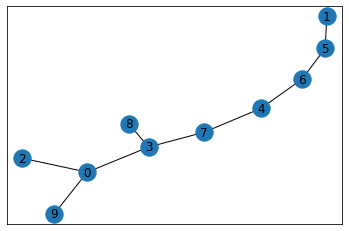

In [75]:
nx.draw_networkx(G)

In [76]:
adatae.obs['paul15_clusters'].cat.categories
# Mk: megakariocytic program
# MEP: Megakaryocites and erytrocytes progenitors

Index(['1Ery', '2Ery', '3Ery', '4Ery', '5Ery', '6Ery', '7MEP', '8Mk', '9GMP',
       '10GMP', '11DC', '12Baso', '13Baso', '14Mo', '15Mo', '16Neu', '17Neu',
       '18Eos', '19Lymph'],
      dtype='object')

La gerarchia ottenuta da NSBM tende a isolare in un ramo gli eritrociti, mentre nell'altro ramo sono presenti i seguenti gruppi: baso+mono+DC, MEP+Mk, Neu+Baso+Eos+GMP,Mono. 
La gerarchia ottenuta da paga, applicato a leiden è simile da un punto di vista strutturale; tuttavia possiamo osservare che le cellule MEP (progenitori eritroidi e megacariocitici)+ Mk sono assimilate subito ad un gruppo di basofili+neutrofili (uno dei primi accoppiamenti della gerarchia).
In generale in entrambe è ben suddivisa la linea eritroide da quella mieloide
### gerarchia paga nsbm vs gerarchia nsbm equilibrate

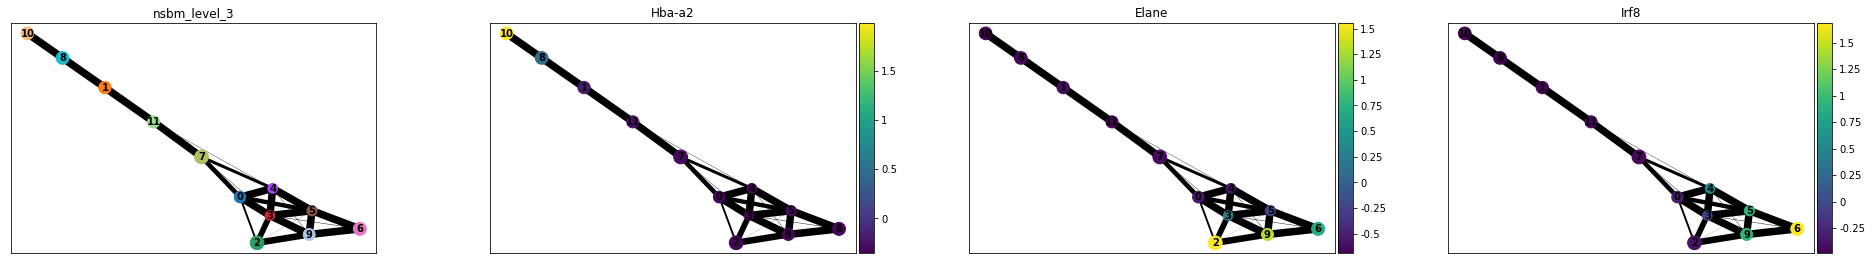

In [27]:
sc.tl.paga(adatae, groups='nsbm_level_3')
sc.pl.paga(adatae, color=['nsbm_level_3', 'Hba-a2', 'Elane', 'Irf8'])

In [28]:
import networkx as nx
G=nx.from_numpy_matrix(adatae.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatae.uns['paga']['connectivities'].todense().A1.reshape((12,12))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

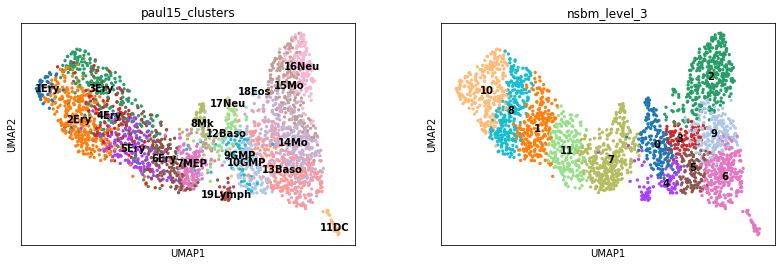

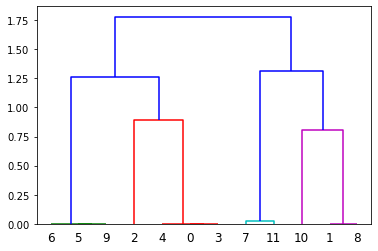

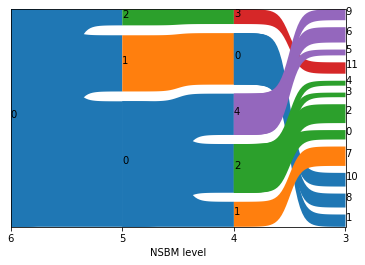

In [38]:
sc.tl.leiden(adatae, resolution=1.0)
sc.pl.umap(adatae, color=['paul15_clusters', 'nsbm_level_3'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatae,level_end=6, level_start=3)

In [39]:
pd.crosstab(adatae.obs.paul15_clusters, adatae.obs.nsbm_level_3)

nsbm_level_3      0   1    2   3   4   5    6    7    8    9   10  11
paul15_clusters                                                      
1Ery              0   0    0   0   0   0    0    0    1    0   42   0
2Ery              0  33    0   0   0   0    0    0  137    0  154   5
3Ery              0  64    0   0   0   0    0    1   88    0   63  30
4Ery              0  59    0   0   0   0    0    0   41    0    7  17
5Ery              0  78    0   0   0   0    0    5    4    0    0  93
6Ery              0   5    0   0   0   0    0   93    0    0    0  75
7MEP              0   0    0   0   2   0    0  164    0    0    0   1
8Mk               2   0    0   0   3   0    0   63    0    0    0   0
9GMP             39   0    0   2   8   4    0   10    0    0    0   0
10GMP            65   0    0   9  41  22    0   16    0    0    0   0
11DC              0   0    0   0   1   0   29    0    0    0    0   0
12Baso           42   0    2   0   1   0    0   24    0    0    0   0
13Baso           12   0    6  43   8  75  133    0    0   23    0   0
14Mo              2   0   64  34   0  12  130    0    0  131    0   0
15Mo              0   0  133   1   0   0    5    0    0   47    0   0
16Neu             0   0  153   0   0   0    1    0    0   10    0   0
17Neu            21   0    0   0   0   0    0    1    0    0    0   0
18Eos             0   0    9   0   0   0    0    0    0    0    0   0
19Lymph           0   0    0   0  31   0    0    0    0    0    0   0

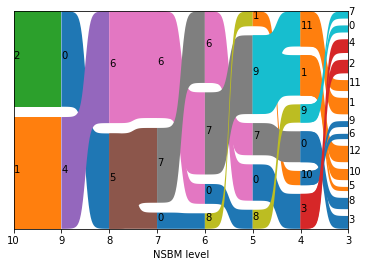

In [26]:
scnsbm.pl.alluvial(cdata,level_end=10, level_start=3)

In [25]:
display_level=3
thr = np.unique([x[3] for x in dendrogram['dcoord']])



cdata = adata.copy()
levels = [np.array(dendrogram['leaves'])]
for l in [scipy.cluster.hierarchy.fcluster(cluster, criterion='distance', t=x) for x in thr]:
    levels.append(np.array(l) - 1)

labels = np.array(adata.obs[f'nsbm_level_{display_level}'].astype(int))
new_labels = np.zeros_like(labels)
    
for lx in range(1, len(levels)):
    tl = levels[lx - 1]
    nl = levels[lx]
    for l in np.unique(nl):
        for lb in np.where(nl == l)[0]:
            new_labels[labels == lb] = l
    cdata.obs[f'nsbm_level_{lx+display_level}'] = pd.Categorical(new_labels).astype(str)
    labels = new_labels
    new_labels = np.zeros_like(labels)



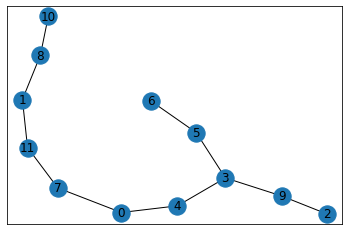

In [80]:
nx.draw_networkx(G)

La gerarchia NSBM è la stessa ottenuta prima (eritroide e mieloide ben suddivise e nella linea mieloide c'è la presenza di MEP e Mk).
Quando si applica paga a NSBM le due linee mieloide ed eritroide sono sempre suddivise correttamente, però le MEP e Mk sono classificate con gli eritrociti ad uno stadio precocissimo della gerarchia.

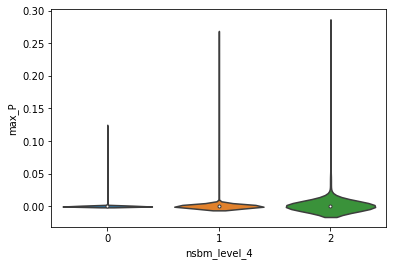

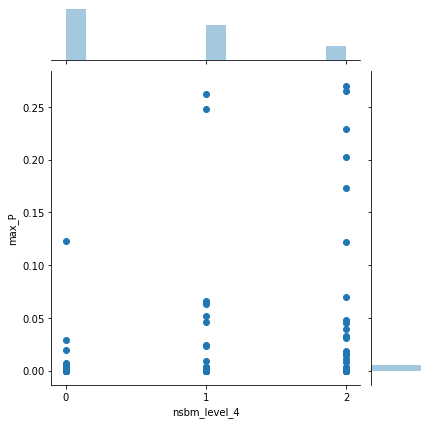

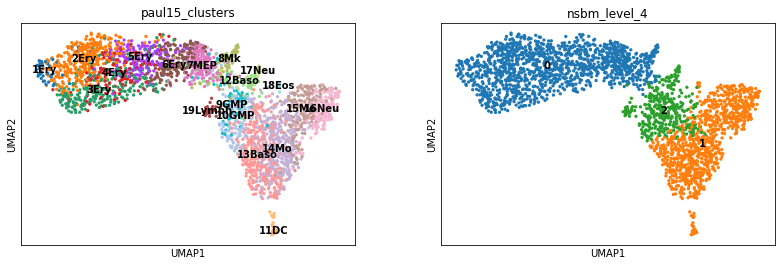

In [15]:
fdata=adata
level=str(4)
marginals = fdata.uns['nsbm']['cell_affinity'][level] 
fdata.obs['max_P'] = -np.log10(np.max(marginals, axis=1))
sns.violinplot(x=f'nsbm_level_{level}', y='max_P', data = fdata.obs,scale='width')
sns.jointplot(x=f'nsbm_level_{level}' , y='max_P', data=fdata.obs)
sc.pl.umap(adata, color=['paul15_clusters',f'nsbm_level_{level}'],legend_loc='on data')

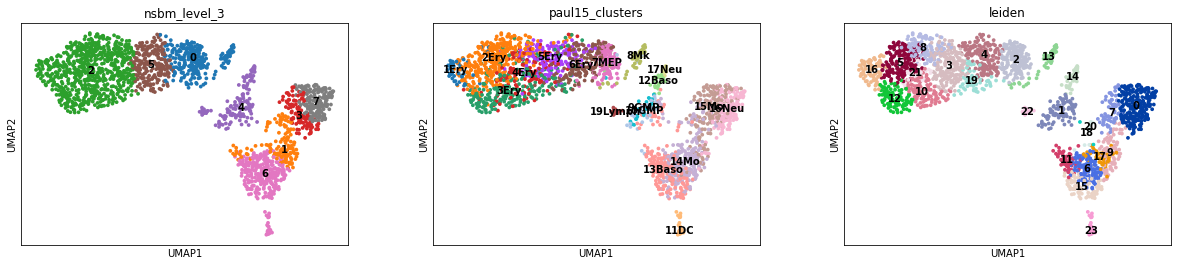

In [16]:
M=adata.uns['nsbm']['cell_affinity']['4']
adata.obs['max_u'] = 1 - np.max(M, axis=1) 
sc.pl.umap(adata[adata.obs.max_u < 1e-100], color=['nsbm_level_3','paul15_clusters','leiden'], legend_loc='on data')